# 🌍 Earthquake Risk Mapping — Visualizations & Mapping
This notebook creates visual and spatial insights from the cleaned earthquake data.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

In [25]:
df = pd.read_csv('../data/cleaned_earthquake_data.csv')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-07-28T12:01:05.160Z,38.771332,-122.7295,1.1500,1.17,md,14.0,65.0,0.01038,0.03,...,2025-07-28T12:02:42.122Z,"2 km ESE of The Geysers, CA",earthquake,0.22,0.320000,0.14,13.0,automatic,nc,nc
1,2025-07-28T11:51:12.495Z,32.365000,-102.1630,3.8480,1.90,ml,58.0,53.0,0.00000,0.50,...,2025-07-28T11:55:25.185Z,"35 km ENE of McKinney Acres, Texas",earthquake,0.00,0.720489,0.10,35.0,automatic,tx,tx
2,2025-07-28T11:42:05.182Z,59.879500,-152.6000,82.3000,1.10,ml,NaN,NaN,NaN,0.29,...,2025-07-28T11:44:23.032Z,"44 km WNW of Anchor Point, Alaska",earthquake,NaN,0.600000,NaN,NaN,automatic,ak,ak
3,2025-07-28T11:38:55.810Z,61.445300,-146.6149,32.4000,1.30,ml,NaN,NaN,NaN,0.39,...,2025-07-28T11:40:24.315Z,"37 km NNW of Valdez, Alaska",earthquake,NaN,0.200000,NaN,NaN,automatic,ak,ak
4,2025-07-28T11:37:22.103Z,31.977000,-101.9890,4.3398,1.30,ml,44.0,32.0,0.10000,0.50,...,2025-07-28T11:41:15.071Z,"8 km ESE of Midland, Texas",earthquake,0.00,0.824726,0.20,31.0,automatic,tx,tx


## 📊 Basic Visualizations
Let's explore the distribution of magnitude and depth.

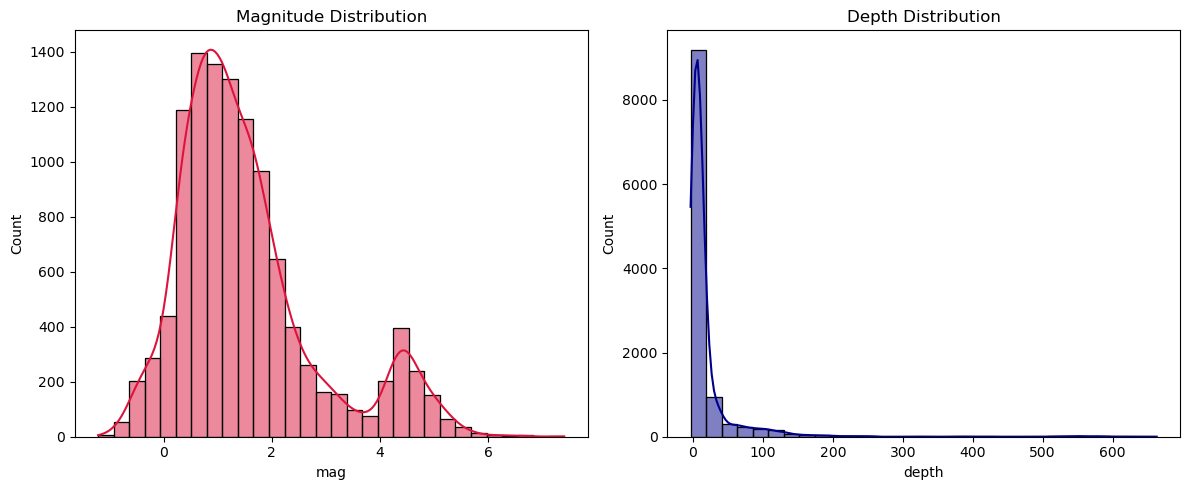

In [26]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['mag'], bins=30, kde=True, color='crimson')
plt.title('Magnitude Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['depth'], bins=30, kde=True, color='darkblue')
plt.title('Depth Distribution')

plt.tight_layout()
plt.show()

## 🗺️ Interactive Map of Earthquakes
Use Folium to show earthquake locations and magnitudes.

In [27]:
# Create a base map
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=2)
marker_cluster = MarkerCluster().add_to(m)

# Add markers
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['mag'] * 1.5,
        popup=f"Magnitude: {row['mag']}, Depth: {row['depth']} km",
        color='red',
        fill=True,
        fill_opacity=0.6
    ).add_to(marker_cluster)

#m

In [28]:
m.save("clustered_earthquake_map.html")

### 🌍 Clustered Earthquake Map

🔗 [View Interactive Map](clustered_earthquake_map.html)

🖼️ Clustered Earthquake map - Static preview:
If you're viewing this on GitHub and cannot see the interactive map above, here's a static snapshot for reference:
(https://github.com/Prasanna2989/earthquake-risk-mapping/blob/master/images/clustered_earthquake_map.png)


## ✅ Summary
We explored earthquake data using both static and interactive visualizations.
This will help identify high-risk zones and better understand the spatial patterns in seismic activity.